# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Tuesday, Apr. 18, submitted via Canvas by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. You may work in teams of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UTID for both students.  Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

Hsien-Yu Liao (hl22678)

Teng-Chieh Huang (th27372)

# Question 1: Ensembles (3+3+3+3=12pts)
In this problem we are going to analyze the breast cancer dataset to predict whether or not an individual suffers from diabetes.  We will be using decision tree classifier with and without the meta methods – Bagging and Boosting. You are free to use either Python or R (take your pick) for this problem.

Use the following code to import the breast cancer dataset.
The dataset consists of 30 features and one target variable.

In [1]:
from sklearn import datasets
diabetes = datasets.load_breast_cancer()
X = diabetes.data
y = diabetes.target

Use the following code to split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note that the random_state parameter is different from HW2.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

If you decided to use R, uncomment the below code and generate the .csv files to use in R.

In [3]:
#np.savetxt("X_train.csv", X_train, delimiter=",")
#np.savetxt("X_test.csv", X_test, delimiter=",")
#np.savetxt("y_train.csv", y_train, delimiter=",")
#np.savetxt("y_test.csv", y_test, delimiter=",")

(a) Fit a classification tree. Plot the tree, and report the mean error rate (fraction of incorrect labels) on test data. Report the confusion matrix. You can use rpart in R to fit the decision tree. In python, use the scikit learn’s tree package.

(b) Apply the random forest classifier to this dataset. Mention any design choices (with reasoning/justification) that you made, e.g. number of trees used, and number of features considered for each tree. Report the mean error rate and the confusion matrix.

(c) Use gradient boosted decision tree (gbdt) to classify the data. Again, you should mention any design choices that you made.  You can use gbm package in R. Report the mean error rate and the confusion matrix.


For random forests and gradient boosted decision trees in python, use scikit learn’s ensemble package.
In R, you can use randomForest and gbm packages.

Show the error rates (misclassification rate) obtained from these three models in a table. **How do these
models compare in terms of the misclassification rate?**

In [14]:
# (a)
from sklearn import datasets
from sklearn import tree
from IPython.display import Image  

diabetes = datasets.load_breast_cancer()
X = diabetes.data
y = diabetes.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
with open("diabetes.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)


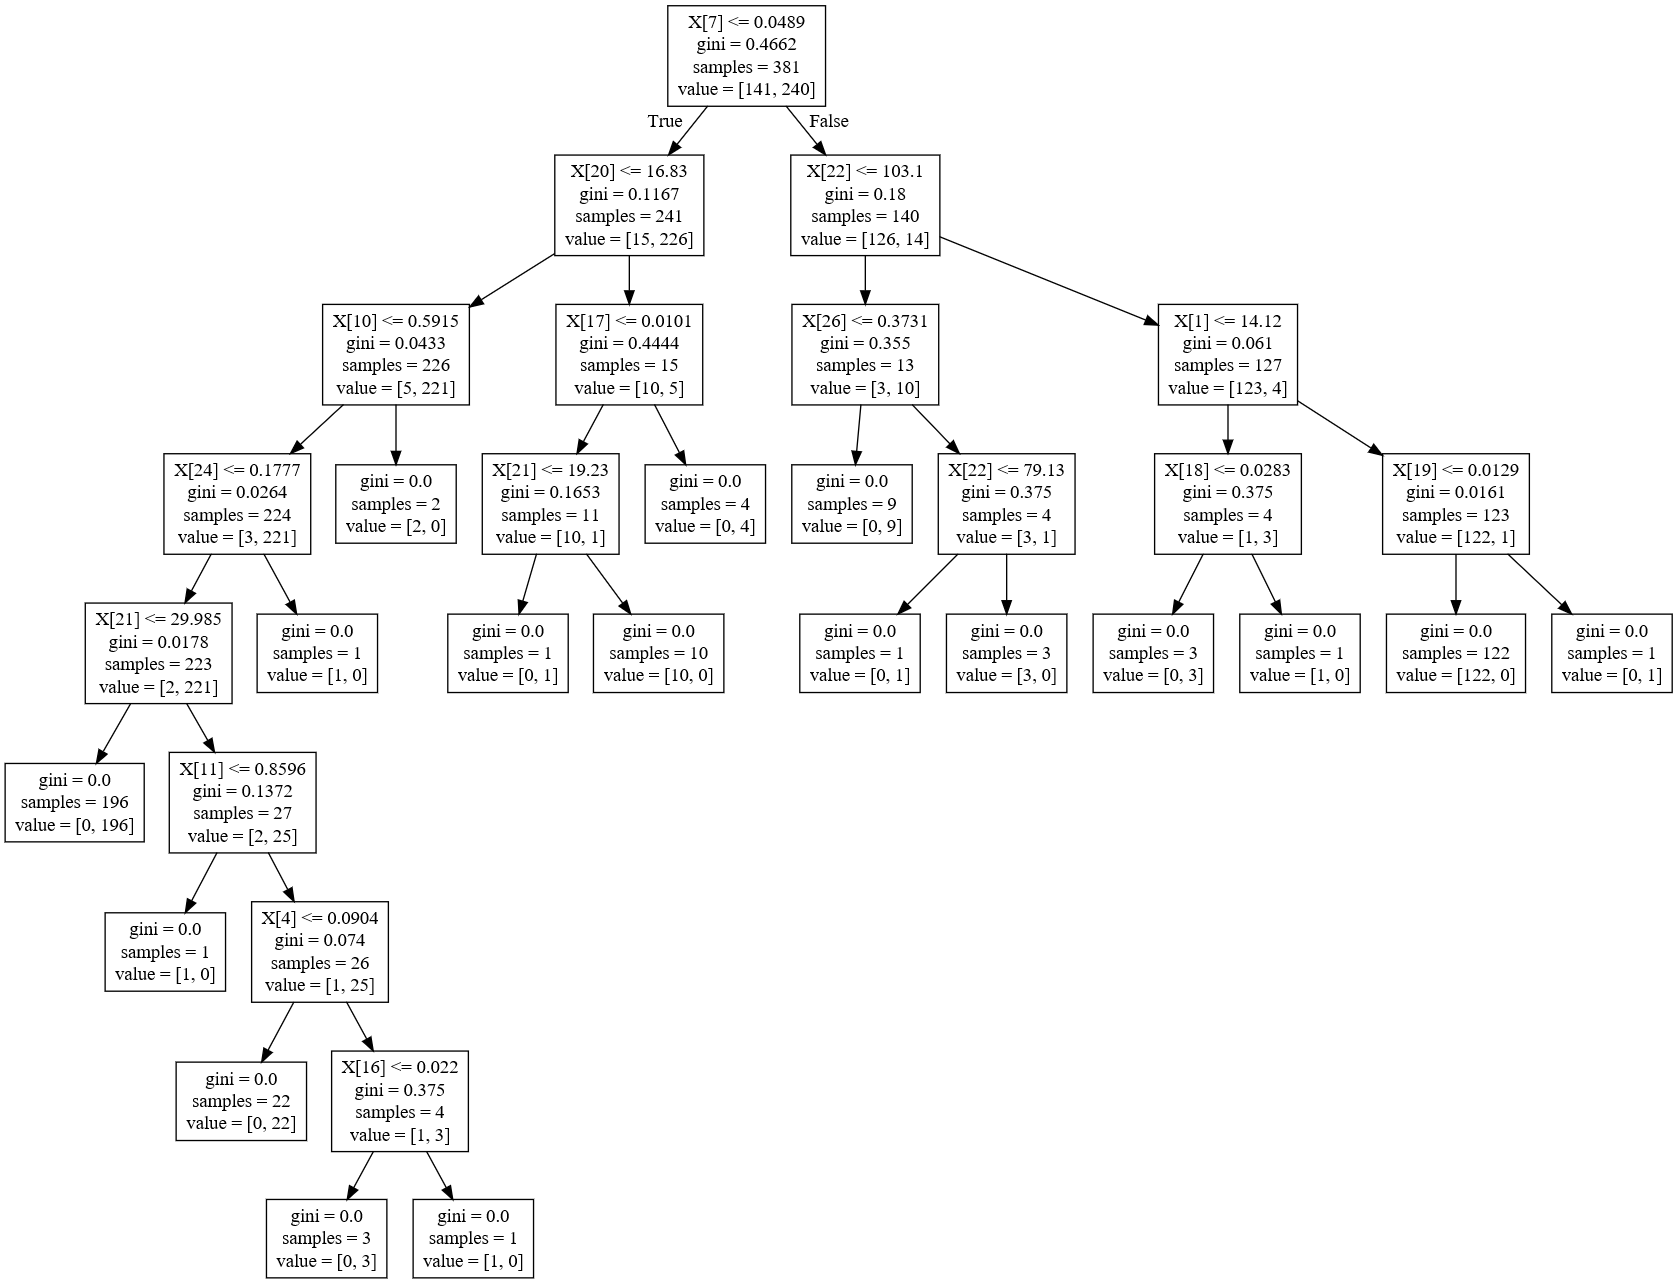

In [12]:
Image(filename='diabetes_tree.png')

In [24]:
clf.score(X_test, y_test)

0.9042553191489362

Error Rate is 0.095745

In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[ 69,   2],
       [ 16, 101]])

In [113]:
# (b)
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, max_features=1 )
clf2 = clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.96808510638297873

Error Rate is 0.031915

In [117]:
confusion_matrix(y_test, clf2.predict(X_test))

array([[ 69,   2],
       [  4, 113]])

For the parameters assigned in the random forest classifier, n_estimators=100 provides more stable and accurate result, and max_features=1 allows higher prediction accuracy. My personal opinion is higher n_estimators and lower max_features come out the better result.

In [122]:
# (c)
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=5, learning_rate=0.5, max_depth=1, random_state=0).fit(X_train, y_train)
clf3.score(X_test, y_test)

0.97872340425531912

Error Rate is 0.021277

In [115]:
confusion_matrix(y_test, clf3.predict(X_test))

array([[ 70,   1],
       [  3, 114]])

For the parameters assigned in the GBDT, n_estimators=5 and learning_rate=0.5 could provide stable result, and max_depth=1 could allows higher prediction accuracy. In GBDT case, there is no need to set n_estimators and learning_rate too high.


                             | Error Rate
    Classification Tree      |  0.095745
    Random Forest Classifier |  0.031915
    GBDT                     |  0.021277

According to the above table, GBDT > Random Forest Classifier > Classification Tree in terms of error rate.

# Question 2: Data Exploration and Regression Analysis (3+3+3+3+3=15pts)

Consider the dataset provided (Boston.csv) which has been slightly modified from the original "Boston Housing" data set. This dataset records properties of 510 housing zones in the Greater Boston area.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('Boston.csv', header = 0)
data = data.drop(['Unnamed: 0'], axis = 'columns')


(a) Generate box-plots of the LSTAT (% of lower status in the population) and MEDVDerived (median home value) attributes and identify the cutoff values for outliers. Generate a scatterplot of MEDV against LSTAT; comment on how inclusion of the outliers would affect a predictive model of median home value as a function of % of lower status in the population. (Hint: Such effects may be easier to visualize if the outliers are in a different color or symbol than the other data.)

C:\Users\Patrick\Anaconda2\lib\site-packages\pandas\computation\expressions.py:181: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


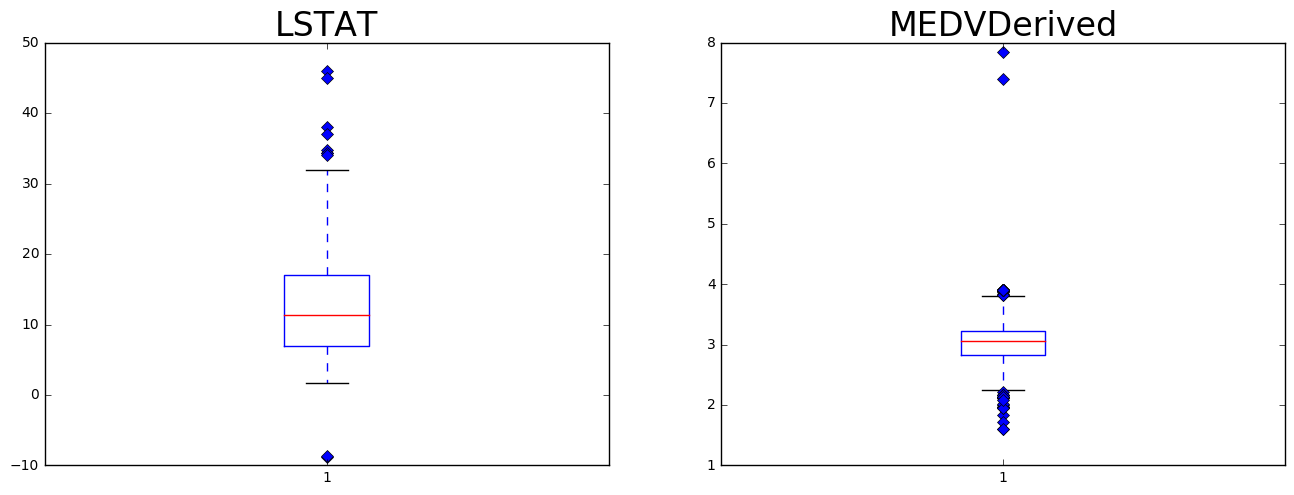

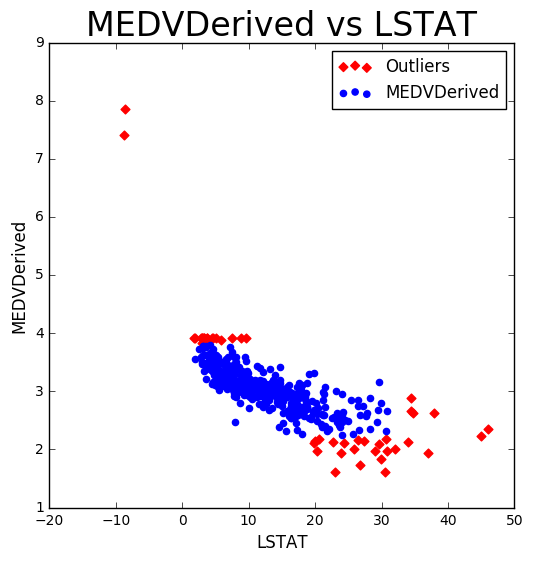

lb_LSTAT:  1.73
ub_LSTAT:  31.99
lb_MED:  2.251291799
ub_MED:  3.802208139
As we can observe in the scatter plot, the MEDVDerived < 2 or > 3.8 will be dominated by outliers which gives us bad prediction in the model if we try to predict in these range.


In [2]:
#Q2-a

plt.clf()

fig1 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(221)
ax1.set_title("LSTAT",size=24)
dict_LSTAT = ax1.boxplot(data['LSTAT'], 0, 'gD');

ax2 = fig1.add_subplot(222)
ax2.set_title("MEDVDerived",size=24)
dict_MED = ax2.boxplot(data['MEDVDerived'], 0, 'gD');

lb_LSTAT = dict_LSTAT['caps'][0].get_data()[1][1];
ub_LSTAT = dict_LSTAT['caps'][1].get_data()[1][1];
lb_MED = dict_MED['caps'][0].get_data()[1][1];
ub_MED = dict_MED['caps'][1].get_data()[1][1];

sel_LSTAT = (data['LSTAT'] > ub_LSTAT) + (data['LSTAT'] < lb_LSTAT)
sel_MEDVD = (data['MEDVDerived'] > ub_MED) + (data['MEDVDerived'] < lb_MED)
fset = sel_LSTAT + sel_MEDVD

fig2 = plt.figure(figsize=(6,6))
ax3 = fig2.add_subplot(111)
ax3.set_title("MEDVDerived vs LSTAT",size=24)
ax3.set_xlabel("LSTAT",size=12)
ax3.set_ylabel("MEDVDerived", size=12)
ax3.scatter(data['LSTAT'][fset], data['MEDVDerived'][fset], color='r', marker='D', label='Outliers');
ax3.scatter(data['LSTAT'][~fset], data['MEDVDerived'][~fset], edgecolor='face');
ax3.legend()

plt.show()

print "lb_LSTAT: ", lb_LSTAT
print "ub_LSTAT: ", ub_LSTAT
print "lb_MED: ", lb_MED
print "ub_MED: ", ub_MED

print "As we can observe in the scatter plot, the MEDVDerived < 2 or > 3.8 will be dominated by outliers which gives us bad prediction in the model if we try to predict in these range."

(b) Let us try to fit an MLR, using ordinary least squares, to this dataset with MEDVDerived as the dependent variable. Keep the first 350 records as a training set (call it Bostrain) which you will use to fit the model; the remaining 160 will be used as a test set (Bostest). 
Use only the following variables (expressed in “R” form for convenience) in your model:
MEDVDerived ∼ LSTAT + RM + CHAS + INDUS + TAX + RAD + BLACK.  Report the RMSE obtained on both Bostrain and Bostest. How much does this increase when you score your model on Bostest?

In [3]:
#Q2-b

data_y=data.get(['MEDVDerived']);
data_X=data.drop(['MEDVDerived'],axis=1);

X_Bostrain = data_X[:350]
y_Bostrain = data_y[:350]
X_Bostest = data_X[350:]
y_Bostest = data_y[350:]

MLR = linear_model.LinearRegression()
MLR.fit(X_Bostrain, y_Bostrain)

RMSE_train = np.mean((MLR.predict(X_Bostrain)-y_Bostrain)**2)**1/2
RMSE_test = np.mean((MLR.predict(X_Bostest)-y_Bostest)**2)**1/2

print "RMSE on Bostrain: ", RMSE_train.tolist()[0]
print "RMSE on Bostest: ", RMSE_test.tolist()[0]

RMSE on Bostrain:  0.0351428212211
RMSE on Bostest:  0.18201389194


(c) Try to predict ”MEDVDerived” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both Bostrain and Bostest.

In [4]:
#Q2-c

HR = linear_model.HuberRegressor(alpha=0.0)
HR.fit(X_Bostrain, y_Bostrain)

RMSE_train = np.mean((HR.predict(X_Bostrain).reshape(350,1)-y_Bostrain)**2)**1/2
RMSE_test = np.mean((HR.predict(X_Bostest).reshape(160,1)-y_Bostest)**2)**1/2

print "RMSE on Bostrain: ", RMSE_train.tolist()[0]
print "RMSE on Bostest: ", RMSE_test.tolist()[0]

RMSE on Bostrain:  0.251372118507
RMSE on Bostest:  0.108474813442


C:\Users\Patrick\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(d) Try to predict ”MEDVDerived” using a Multi-layer Perceptron (MLP) regression.  Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,)
    
Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.  Report the RMSE obtained on both Bostrain and Bostest.

In [5]:
#Q2-d

from sklearn.preprocessing import StandardScaler
from sklearn import neural_network

MLPR = neural_network.MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,))

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_Bostrain)
X_test = X_scaler.fit_transform(X_Bostest)

MLPR.fit(X_train, y_Bostrain)

RMSE_train = np.mean((MLPR.predict(X_train).reshape(350,1)-y_Bostrain)**2)**1/2
RMSE_test = np.mean((MLPR.predict(X_test).reshape(160,1)-y_Bostest)**2)**1/2

print "RMSE on Bostrain: ", RMSE_train.tolist()[0]
print "RMSE on Bostest: ", RMSE_test.tolist()[0]


C:\Users\Patrick\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE on Bostrain:  0.0477889075513
RMSE on Bostest:  0.148859293093


C:\Users\Patrick\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


(e) Compare and comment on the model fits (plot actual vs. predicted values) obtained in (b), (c), and (d). How do outliers affect the relative performance of ordinary least squares regression, robust regression with Huber loss, and MLP?

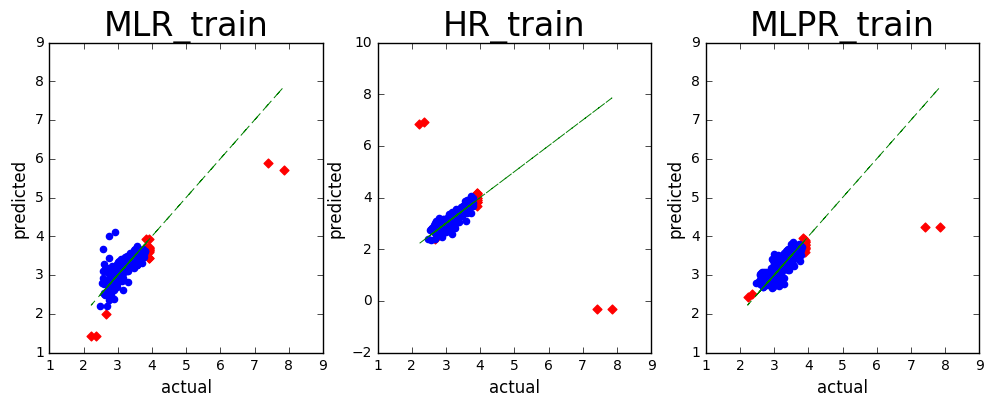

Red dots are the outliers in data.
In training data, all three models perform well in predicting data; however, the MLPR handles the outliers better than other models.


In [6]:
#Q2-e train data

# plotting train data

fset_train = fset[:350]

plt.clf()

fig1 = plt.figure(figsize=(12,4))
ax1 = fig1.add_subplot(131)
ax1.set_title("MLR_train",size=24)
ax1.set_xlabel("actual",size=12)
ax1.set_ylabel("predicted", size=12)
MLR_pred = pd.DataFrame(MLR.predict(X_Bostrain))
ax1.scatter(y_Bostrain[fset_train], MLR_pred[fset_train], c='r', marker = 'D', edgecolor='face');
ax1.scatter(y_Bostrain[~fset_train], MLR_pred[~fset_train], c='b', edgecolor='face');
ax1.plot(y_Bostrain,y_Bostrain,'g--',linewidth=0.7)

ax2 = fig1.add_subplot(132)
ax2.set_title("HR_train",size=24)
ax2.set_xlabel("actual",size=12)
ax2.set_ylabel("predicted", size=12)
HR_pred = pd.DataFrame(HR.predict(X_Bostrain))
ax2.scatter(y_Bostrain[fset_train], HR_pred[fset_train], c='r', marker = 'D', edgecolor='face');
ax2.scatter(y_Bostrain[~fset_train], HR_pred[~fset_train], c='b', edgecolor='face');
ax2.plot(y_Bostrain,y_Bostrain,'g--',linewidth=0.7)

ax3 = fig1.add_subplot(133)
ax3.set_title("MLPR_train",size=24)
ax3.set_xlabel("actual",size=12)
ax3.set_ylabel("predicted", size=12)
MLPR_pred = pd.DataFrame(MLPR.predict(X_train))
ax3.scatter(y_Bostrain[fset_train], MLPR_pred[fset_train], c='r', marker = 'D', edgecolor='face');
ax3.scatter(y_Bostrain[~fset_train], MLPR_pred[~fset_train], c='b', edgecolor='face');
ax3.plot(y_Bostrain,y_Bostrain,'g--',linewidth=0.7)

plt.show()

print "Red dots are the outliers in data."
print "In training data, all three models perform well in predicting data; however, the MLPR handles the outliers better than other models."


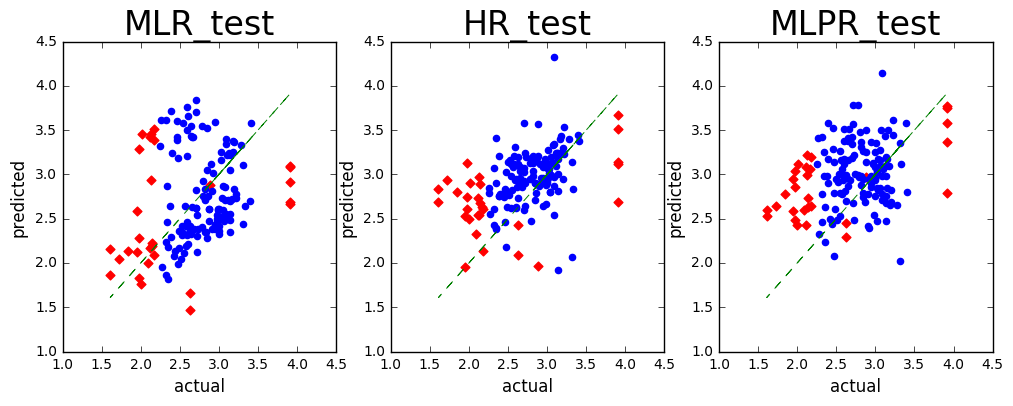

Red dots are the outliers in data.
In testing data, all three models perform moderately. No specific model handles outliers properly; or in other words, they all handle them in similar predictions.


In [7]:
#Q2-e test data

# plotting test data

fset_test = fset[350:]
plt.clf()

fig1 = plt.figure(figsize=(12,4))
ax1 = fig1.add_subplot(131)
ax1.set_title("MLR_test",size=24)
ax1.set_xlabel("actual",size=12)
ax1.set_ylabel("predicted", size=12)
MLR_pred = pd.DataFrame(MLR.predict(X_Bostest))
MLR_pred.index = range(350, 510)
ax1.scatter(y_Bostest[fset_test], MLR_pred[fset_test], c='r', marker = 'D', edgecolor='face');
ax1.scatter(y_Bostest[~fset_test], MLR_pred[~fset_test], c='b', edgecolor='face');
ax1.plot(y_Bostest,y_Bostest,'g--',linewidth=0.7);

ax2 = fig1.add_subplot(132)
ax2.set_title("HR_test",size=24)
ax2.set_xlabel("actual",size=12)
ax2.set_ylabel("predicted", size=12)
HR_pred = pd.DataFrame(HR.predict(X_Bostest))
HR_pred.index = range(350, 510)
ax2.scatter(y_Bostest[fset_test], HR_pred[fset_test], c='r', marker = 'D', edgecolor='face');
ax2.scatter(y_Bostest[~fset_test], HR_pred[~fset_test], c='b', edgecolor='face');
ax2.plot(y_Bostest,y_Bostest,'g--',linewidth=0.7);

ax3 = fig1.add_subplot(133)
ax3.set_title("MLPR_test",size=24)
ax3.set_xlabel("actual",size=12)
ax3.set_ylabel("predicted", size=12)
MLPR_pred = pd.DataFrame(MLPR.predict(X_test))
MLPR_pred.index = range(350, 510)
ax3.scatter(y_Bostest[fset_test], MLPR_pred[fset_test], c='r', marker = 'D', edgecolor='face');
ax3.scatter(y_Bostest[~fset_test], MLPR_pred[~fset_test], c='b', edgecolor='face');
ax3.plot(y_Bostest,y_Bostest,'g--',linewidth=0.7);

plt.show()

print "Red dots are the outliers in data."
print "In testing data, all three models perform moderately. No specific model handles outliers properly; or in other words, they all handle them in similar predictions."

# Question 3 - Sampling (4+4=8pts)

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). CBS wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.05, ε = 0.02 (i.e. your answer will be pˆ ± 0.02), what is the minimum value of n needed if (i) true value p = 0.25 and (ii) p = 0.75?

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.05. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 3 from the original value, but maintaining α = 0.1. In each case how many samples would you need now?

Q3-ans

1.

Plug coresponding values into the equation: $ n >= p(1-p)(Z_{\alpha / 2} / \epsilon)^{2} $ with $ Z_{\alpha / 2} = 1.96 $  for $ \alpha = 0.05 $

(i) $ n >= 0.25*0.75*(1.96/0.02)^{2}= 1800.75 $ Thus, we can take n = 1801

(ii) $ n >= 0.75*0.25*(1.96/0.02)^{2}= 1800.75 $ Thus, we can take n = 1801

2.

$ Z_{\alpha / 2} = 2.58 $  for $ \alpha = 0.01 $

$ Z_{\alpha / 2} = 1.96 $  for $ \alpha = 0.05 $

$ Z_{\alpha / 2} = 1.65 $  for $ \alpha = 0.1 $

From the assumption, we have this relationship: $ 1000 >= p(1-p)(1.96 / \epsilon)^{2} $

(i) Replacing with the new $ Z_{\alpha / 2} = 2.58 $  for $ \alpha = 0.01 $ => n will increase by a factor of $(2.58/1.96)^{2} = 1.732$ Thus, n' = 1733

(ii) Replacing with the new $ Z_{\alpha / 2} = 1.65 $  for $ \alpha = 0.1 $ and $ \epsilon' = \epsilon/3 $ => n will increase by a factor of $(3*1.65/1.96)^{2} = 6.378$ Thus, n' = 6379


# Question 4 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

Q4-ans

In K-nearest neighbors, increasing k results in the averaging of more voters in each prediction. This results in smoother prediction curves. Increasing k will decrease variance and increase bias. While decreasing k will increase variance and decrease bias. If we increase k too much, then we no longer follow the true boundary line and we observe high bias.

# Question 5 - Feature Selection (2pts)
Briefly explain what you understand by these two  methods for selecting a subset of features for a supervised learning problem: (i) forward selection and (ii) backward selection (no more than 1 paragraph).

Q5-ans

Forward selection is bottom-up inclusion method, which begins with an empty set and adds features untill some termination criterion is met. On the other hand, backward selection is top-down elemination method, which begins with a full set and deletes the features untill termination criterion is met. Both methods do not examine all possible subsets so no guarantee of finding the optimal subset.

# Question 6 - Eigenfaces (4+3+4=11pts)

In this question, you will explore an application of PCA in image analysis. This question requires images.tar.gz from Canvas. This archive contains 400 images in .pgm format taken from http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html. The images can be read into python as matrices using the steps: Coding guidelines below are only for convenience and you can use any other alternatives within python that provide the same functionality, if available.

To load a given image (e.g. ‘1.pgm’) as a matrix (grey scale representation of the image) and display it, use the following code snippet :

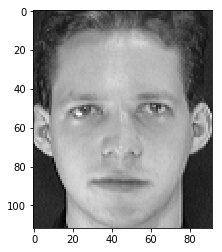

In [4]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import os
%matplotlib inline

img_path = os.getcwd()+'/images/'
img = misc.imread(img_path + '1.pgm')
plt.imshow(img, cmap=plt.cm.gray)

Each image matrix is of size 112 × 92. Vectorize the matrix for each image, and concatenate all image vectors to form a big 400 × 10304 data matrix. For example, to convert ‘img’ to its vector form ‘img vec’, use the following:

In [5]:
img_vec = img.flatten()

To stack all images into a matrix, use numpy’s ‘vstack’ function. The following command will append the array ‘img_vec’ to the matrix ‘img_mat’. Note that you have to first initialize an empy ‘img mat’ with 10304 columns and 0 rows.

In [6]:
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
img_mat = np.vstack((img_mat, img_vec))

Each face can be represented as weighted sum of canonical matrices called eigenfaces. You will project the data matrix onto lower dimensions and see how inclusion of directions in decreasing order of importance according to data spread impacts the quality of the image.

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the first 50 principal components of the img_mat data.  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. 

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 20%, 50%, and 80%, respectively?

(c) Reconstruct your original matrix using the number of principal components (N1, N2, N3) you derived in question (b).  Then, pick any one image and plot.  Note that you first want to reshape your vectorized image using the ‘reshape’ command in numpy:

In [7]:
# rec_img = np.reshape(rec_mat[n,:], (img_width,img_height))

Here ‘rec_mat’ is your recovered image matrix using only top-k principal components. (should be of dimension 400 × 10304) and you want to convert the nth vector to an image of the original size (img width = 112 and img height = 92).
You can plot an image matrix using the following function (pylab library should be loaded).

In [8]:
# import pylab
# pylab.figure()
# pylab.imshow(rec_img, cmap=plt.cm.gray)
# pylab.show()

In [146]:
#(a)
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import os
%matplotlib inline

img_path = os.getcwd()+'/images/'
img = misc.imread(img_path + str(1)+ '.pgm')
img_vec = img.flatten()
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
for i in range (1,400):
    img = misc.imread(img_path + str(i)+ '.pgm')
    #plt.imshow(img, cmap=plt.cm.gray)
    img_vec = img.flatten()
    img_mat = np.vstack((img_mat, img_vec))

In [165]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(img_mat)
#print (pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

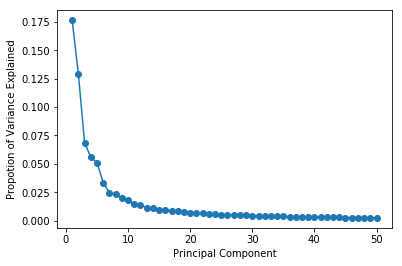

In [161]:
import matplotlib.pyplot as plt
x = np.arange(1.0, 51.0, 1.0)
y = pca.explained_variance_ratio_
plt.xlabel('Principal Component')
plt.ylabel('Propotion of Variance Explained')
plt.plot(x ,y, 'o-')

[ 0.17640403  0.30541056  0.37394163  0.42982261  0.48081117  0.51424233
  0.53876425  0.56211855  0.58170398  0.59975615  0.61410508  0.62800187
  0.63920905  0.64989866  0.65963937  0.66874113  0.67749969  0.68589714
  0.69325717  0.70022093  0.70694397  0.7133328   0.71927158  0.72472077
  0.73001963  0.73496548  0.73976368  0.74452877  0.74900782  0.75336838
  0.75765789  0.76163454  0.76558096  0.76937982  0.77306667  0.77657271
  0.77996883  0.78331869  0.78648576  0.78947662  0.79241598  0.79531023
  0.79811521  0.80086657  0.80348637  0.80604226  0.80858115  0.81104844
  0.81343453  0.81577158]


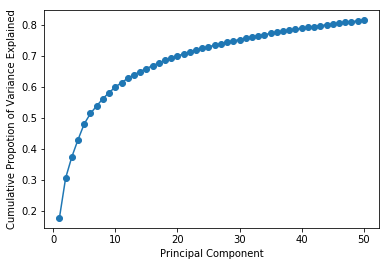

In [162]:
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Propotion of Variance Explained')
plt.plot(x ,np.cumsum(y), 'o-')
print (np.cumsum(y))

(b)

(N1, N2, N3) = (2, 6, 44)

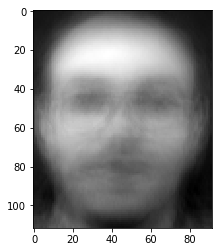

In [202]:
# (c)
# N1 = 2
img_mat = np.zeros((0,img_width*img_height))
for i in range (1,400):
    img = misc.imread(img_path + str(i)+ '.pgm')
    img_vec = img.flatten()
    img_mat = np.vstack((img_mat, img_vec))
pca = PCA(n_components=2)
pca.fit(img_mat)
img_mat_new = pca.transform(img_mat)
rec_mat = pca.inverse_transform(img_mat_new)
    
#rec_mat = pca.components_
rec_img = np.reshape(rec_mat[100,:], (img_width,img_height))
import pylab
pylab.figure()
pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()

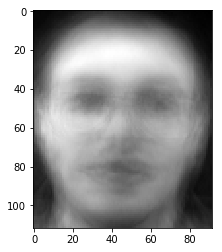

In [203]:
# N2 = 6
pca = PCA(n_components=6)
pca.fit(img_mat)
img_mat_new = pca.transform(img_mat)
rec_mat = pca.inverse_transform(img_mat_new)
    
#rec_mat = pca.components_
rec_img = np.reshape(rec_mat[100,:], (img_width,img_height))
import pylab
pylab.figure()
pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()

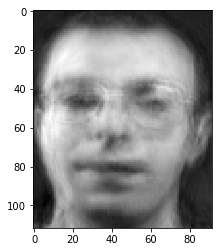

In [204]:
# N3 = 44
pca = PCA(n_components=44)
pca.fit(img_mat)
img_mat_new = pca.transform(img_mat)
rec_mat = pca.inverse_transform(img_mat_new)
    
#rec_mat = pca.components_
rec_img = np.reshape(rec_mat[100,:], (img_width,img_height))
import pylab
pylab.figure()
pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()